# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Creat-a-dataframe" data-toc-modified-id="Creat-a-dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creat a dataframe</a></div><div class="lev1 toc-item"><a href="#Reading/Saving-a-csv/tabular-data-file-into-Pandas" data-toc-modified-id="Reading/Saving-a-csv/tabular-data-file-into-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading/Saving a csv/tabular data file into Pandas</a></div><div class="lev1 toc-item"><a href="#Getting-first/last-x-rows." data-toc-modified-id="Getting-first/last-x-rows.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting first/last x rows.</a></div><div class="lev1 toc-item"><a href="#Changing-column-labels." data-toc-modified-id="Changing-column-labels.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Changing column labels.</a></div><div class="lev1 toc-item"><a href="#Finding-out-rows/dimension/data-types-of-a-dataset-has." data-toc-modified-id="Finding-out-rows/dimension/data-types-of-a-dataset-has.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding out rows/dimension/data types of a dataset has.</a></div><div class="lev1 toc-item"><a href="#Finding-out-basic-statistical-information-on-your-dataset." data-toc-modified-id="Finding-out-basic-statistical-information-on-your-dataset.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Finding out basic statistical information on your dataset.</a></div><div class="lev1 toc-item"><a href="#How-to-change-data-types-of-a-pandas-Series" data-toc-modified-id="How-to-change-data-types-of-a-pandas-Series-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How to change data types of a pandas Series</a></div><div class="lev1 toc-item"><a href="#index" data-toc-modified-id="index-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>index</a></div><div class="lev2 toc-item"><a href="#Setting-a-new-index-from-an-existing-column" data-toc-modified-id="Setting-a-new-index-from-an-existing-column-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Setting a new index from an existing column</a></div><div class="lev2 toc-item"><a href="#sort-index" data-toc-modified-id="sort-index-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>sort index</a></div><div class="lev2 toc-item"><a href="#Returning-an-index-to-data" data-toc-modified-id="Returning-an-index-to-data-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Returning an index to data</a></div><div class="lev1 toc-item"><a href="#How-to-use-'axis'" data-toc-modified-id="How-to-use-'axis'-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How to use 'axis'</a></div><div class="lev1 toc-item"><a href="#Getting/Remove-a-column-or-a-subset-of-columns" data-toc-modified-id="Getting/Remove-a-column-or-a-subset-of-columns-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Getting/Remove a column or a subset of columns</a></div><div class="lev1 toc-item"><a href="#Getting/Remove-a-row" data-toc-modified-id="Getting/Remove-a-row-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Getting/Remove a row</a></div><div class="lev1 toc-item"><a href="#booleans-and-Filtering" data-toc-modified-id="booleans-and-Filtering-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>booleans and Filtering</a></div><div class="lev2 toc-item"><a href="#Creating-a-series-of-booleans-based-on-a-conditional" data-toc-modified-id="Creating-a-series-of-booleans-based-on-a-conditional-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Creating a series of booleans based on a conditional</a></div><div class="lev2 toc-item"><a href="#Using-a-series-of-booleans-to-filter" data-toc-modified-id="Using-a-series-of-booleans-to-filter-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Using a series of booleans to filter</a></div><div class="lev2 toc-item"><a href="#Filtering-by-multiple-conditionals" data-toc-modified-id="Filtering-by-multiple-conditionals-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Filtering by multiple conditionals</a></div><div class="lev2 toc-item"><a href="#Filtering-by-string-methods" data-toc-modified-id="Filtering-by-string-methods-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Filtering by string methods</a></div><div class="lev1 toc-item"><a href="#How-to-use-string-methods-in-Pandas" data-toc-modified-id="How-to-use-string-methods-in-Pandas-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>How to use string methods in Pandas</a></div><div class="lev1 toc-item"><a href="#Add-a-column-to-a-dataframe" data-toc-modified-id="Add-a-column-to-a-dataframe-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Add a column to a dataframe</a></div><div class="lev1 toc-item"><a href="#Applying-a-function-to-a-column" data-toc-modified-id="Applying-a-function-to-a-column-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Applying a function to a column</a></div><div class="lev1 toc-item"><a href="#Grouby" data-toc-modified-id="Grouby-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Grouby</a></div><div class="lev2 toc-item"><a href="#Groupby-one-column" data-toc-modified-id="Groupby-one-column-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Groupby one column</a></div><div class="lev2 toc-item"><a href="#Grouping-by-multiple-columns" data-toc-modified-id="Grouping-by-multiple-columns-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Grouping by multiple columns</a></div><div class="lev1 toc-item"><a href="#pivot_table" data-toc-modified-id="pivot_table-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>pivot_table</a></div><div class="lev1 toc-item"><a href="#Crosstab" data-toc-modified-id="Crosstab-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Crosstab</a></div><div class="lev1 toc-item"><a href="#sort_values" data-toc-modified-id="sort_values-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>sort_values</a></div><div class="lev2 toc-item"><a href="#Sort-Series" data-toc-modified-id="Sort-Series-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>Sort Series</a></div><div class="lev2 toc-item"><a href="#Sort-DataFrame-by-Series" data-toc-modified-id="Sort-DataFrame-by-Series-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>Sort DataFrame by Series</a></div><div class="lev1 toc-item"><a href="#value_counts" data-toc-modified-id="value_counts-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>value_counts</a></div><div class="lev1 toc-item"><a href="#合并数据集" data-toc-modified-id="合并数据集-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>合并数据集</a></div><div class="lev1 toc-item"><a href="#Missing-Values" data-toc-modified-id="Missing-Values-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Missing Values</a></div><div class="lev2 toc-item"><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-22.1"><span class="toc-item-num">22.1&nbsp;&nbsp;</span>Drop missing values</a></div><div class="lev2 toc-item"><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-22.2"><span class="toc-item-num">22.2&nbsp;&nbsp;</span>Fill missing values</a></div><div class="lev1 toc-item"><a href="#Plots" data-toc-modified-id="Plots-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Plots</a></div>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# Creat a dataframe

In [2]:
df0 = pd.DataFrame({'x' : np.random.normal(0,1,1000),
                   'y' : np.random.normal(0,1,1000),
                   'z': np.random.normal(0,1,1000),
                   'c': np.random.choice(['a','b'], 1000),
                   'd': np.random.choice(['p','n'], 1000)})
df0.head()

,c,d,x,y,z
0,a,p,1.368480,0.740306,-0.560068
1,b,n,0.532456,-2.040384,0.983377
2,b,n,1.620585,-1.454212,0.370841
3,a,n,0.532927,1.234950,-0.090737
4,b,p,-0.123597,0.596391,-2.794628


# Reading/Saving a csv/tabular data file into Pandas

In [3]:
df = pd.read_csv('iris.csv', header=0)
# If there are no column names you can set header to None. 

In [4]:
df2 = pd.read_table('olympics.txt')
# by default, sep is tab, first row is header

In [5]:
chiporders = pd.read_table('http://bit.ly/chiporders')

In [6]:
movieusers = pd.read_table('http://bit.ly/movieusers', sep='|', header=None)

In [7]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [8]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [9]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [10]:
ufo.to_csv('ufo.csv')

# Getting first/last x rows.

In [11]:
df.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [12]:
df.tail(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


# Changing column labels.

In [13]:
df.columns = ['idx','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [14]:
movieusers.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movieusers.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [15]:
ufo.columns

Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time'], dtype='object')

In [16]:
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index([u'City', u'Colors_Reported', u'Shape_Reported', u'State', u'Time'], dtype='object')

In [17]:
ufo_cols = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.head(2)

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [18]:
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_cols, header=0)
# header=0 is needed
ufo.head(2)

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [19]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.head(2)

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


# Finding out rows/dimension/data types of a dataset has.

In [20]:
len(df)

150

In [21]:
df.shape

(150, 6)

In [22]:
df.dtypes

idx               int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Finding out basic statistical information on your dataset.

In [23]:
pd.options.display.float_format = '{:,.3f}'.format 
# Limit output to 3 decimal places.
df.describe()
# only for numerical columns

,idx,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.057,3.758,1.199
std,43.445,0.828,0.436,1.765,0.762
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


In [24]:
df.cov()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,"1,887.500",25.783,-7.618,67.693,29.805
sepal_length,25.783,0.686,-0.042,1.274,0.516
sepal_width,-7.618,-0.042,0.190,-0.330,-0.122
petal_length,67.693,1.274,-0.330,3.116,1.296
petal_width,29.805,0.516,-0.122,1.296,0.581


In [25]:
df.corr()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,1.000,0.717,-0.402,0.883,0.900
sepal_length,0.717,1.000,-0.118,0.872,0.818
sepal_width,-0.402,-0.118,1.000,-0.428,-0.366
petal_length,0.883,0.872,-0.428,1.000,0.963
petal_width,0.900,0.818,-0.366,0.963,1.000


# How to change data types of a pandas Series

In [26]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.000,Asia
1,Albania,89,132,54,4.900,Europe
2,Algeria,25,0,14,0.700,Africa
3,Andorra,245,138,312,12.400,Europe
4,Angola,217,57,45,5.900,Africa


In [27]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [28]:
drinks.beer_servings = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [29]:
chiporders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [30]:
chiporders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [31]:
chiporders.item_price.str.replace('$','').astype(float).mean()

7.464335785374397

In [32]:
chiporders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [33]:
chiporders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

# index

## Setting a new index from an existing column

In [34]:
df = df.set_index(['idx'])
# This will make the column ‘idx’ an index.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
1,5.100,3.500,1.400,0.200,setosa
2,4.900,3.000,1.400,0.200,setosa
3,4.700,3.200,1.300,0.200,setosa
4,4.600,3.100,1.500,0.200,setosa
5,5.000,3.600,1.400,0.200,setosa


## sort index

In [35]:
df.sort_index(ascending=False).head(5) 
#inplace=True to apple the sorting in place

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
150,5.900,3.000,5.100,1.800,virginica
149,6.200,3.400,5.400,2.300,virginica
148,6.500,3.000,5.200,2.000,virginica
147,6.300,2.500,5.000,1.900,virginica
146,6.700,3.000,5.200,2.300,virginica


## Returning an index to data

In [36]:
df = df.reset_index('idx')
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


# How to use 'axis'

In [37]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.000,0,0,0.000,Asia
1,Albania,89.000,132,54,4.900,Europe
2,Algeria,25.000,0,14,0.700,Africa
3,Andorra,245.000,138,312,12.400,Europe
4,Angola,217.000,57,45,5.900,Africa


In [38]:
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.000,0,0,0.000
1,Albania,89.000,132,54,4.900
2,Algeria,25.000,0,14,0.700
3,Andorra,245.000,138,312,12.400
4,Angola,217.000,57,45,5.900


In [39]:
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.000,0,0,0.000,Asia
1,Albania,89.000,132,54,4.900,Europe
3,Andorra,245.000,138,312,12.400,Europe
4,Angola,217.000,57,45,5.900,Africa
5,Antigua & Barbuda,102.000,128,45,4.900,North America


In [40]:
drinks.mean()
# only numerical columns, default axis=0

beer_servings                  106.161
spirit_servings                 80.995
wine_servings                   49.451
total_litres_of_pure_alcohol     4.717
dtype: float64

In [41]:
drinks.mean(axis='index')
# axis='index' is the same as axis=0

beer_servings                  106.161
spirit_servings                 80.995
wine_servings                   49.451
total_litres_of_pure_alcohol     4.717
dtype: float64

In [42]:
drinks.mean(axis=1).head()

0     0.000
1    69.975
2     9.925
3   176.850
4    81.225
dtype: float64

In [43]:
drinks.mean(axis='columns').head()
# axis='columns' is the same as axis=1

0     0.000
1    69.975
2     9.925
3   176.850
4    81.225
dtype: float64

# Getting/Remove a column or a subset of columns

In [44]:
df['sepal_length'].head(2) # by []

0   5.100
1   4.900
Name: sepal_length, dtype: float64

In [45]:
ufo['City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [46]:
df.sepal_length.head(2) # by .

0   5.100
1   4.900
Name: sepal_length, dtype: float64

In [47]:
ufo.City.head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [48]:
df[['sepal_length', 'sepal_width']].head(2) # Selecting a subset of columns

,sepal_length,sepal_width
0,5.100,3.500
1,4.900,3.000


In [49]:
ufo.drop('City', axis=1, inplace=True)
# axis: 0-row, 1-column
ufo.head(2)

,Colors_Reported,Shape_Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00


In [50]:
ufo.drop(['State', 'Time'], axis=1, inplace=True)
ufo.head(2)

,Colors_Reported,Shape_Reported
0,NaN,TRIANGLE
1,NaN,OTHER


# Getting/Remove a row

In [51]:
df.iloc[30] # via a numerical index

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [52]:
df.loc[30] # via a label-based index
# This, like iloc will return a series of the row you reference. 
# The only difference is this time you are using label based 
# referencing not numerical based.
# Note: idx starts from 1 while index starts from 0

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [53]:
df.ix[30] # via a label-based or numerical index
# Label based with numerical index fallback 
# *Not recommended

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [54]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [55]:
ufo.drop(0, axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30


In [56]:
ufo.drop([1,2], axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00


# booleans and Filtering

## Creating a series of booleans based on a conditional

In [57]:
boolean = df.sepal_length < 5
boolean.head()

0    False
1     True
2     True
3     True
4    False
Name: sepal_length, dtype: bool

## Using a series of booleans to filter

In [58]:
df[boolean].head()

,idx,sepal_length,sepal_width,petal_length,petal_width,species
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa
6,7,4.600,3.400,1.400,0.300,setosa
8,9,4.400,2.900,1.400,0.200,setosa


In [59]:
df[df.sepal_length < 5].head()

,idx,sepal_length,sepal_width,petal_length,petal_width,species
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa
6,7,4.600,3.400,1.400,0.300,setosa
8,9,4.400,2.900,1.400,0.200,setosa


In [60]:
df[~(df.sepal_length < 5)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


## Filtering by multiple conditionals

In [61]:
df[(df.sepal_length < 5) & (df.sepal_width > 3)].head(2)
# Can't use the keyword 'and'

,idx,sepal_length,sepal_width,petal_length,petal_width,species
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa


In [62]:
df[(df.sepal_length < 5) | (df.sepal_width > 3)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa


In [63]:
movies[(movies.genre=='Drama') | (movies.genre=='Crime') | (movies.genre=='Action')].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.300,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.200,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.100,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.000,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.900,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [64]:
movies[movies.genre.isin(['Action','Crime', 'Drama'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.300,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.200,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.100,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.000,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.900,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Filtering by string methods

In [65]:
df[df.species.str.startswith('seto')].head(3)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa


# How to use string methods in Pandas

In [66]:
chiporders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [67]:
chiporders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [68]:
chiporders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [69]:
chiporders.choice_description.str.replace('[', '').str.replace(']','').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [70]:
chiporders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [71]:
chiporders.choice_description.str.replace('[\[, \]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-RedChiliSalsa(Hot)BlackBeansRiceChee...
Name: choice_description, dtype: object

# Add a column to a dataframe

In [72]:
year = np.random.randint(low=1980,high=2016,size=len(df))
month = np.random.randint(low=1,high=13,size=len(df))
date = []
for y, m in zip(year, month):
    y = str(y)
    m = str(m)
    date.append('/'.join((y, m)))

In [73]:
df['date'] = pd.Series(date, index=df.index)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date
0,1,5.100,3.500,1.400,0.200,setosa,2004/8
1,2,4.900,3.000,1.400,0.200,setosa,2008/4
2,3,4.700,3.200,1.300,0.200,setosa,1995/3
3,4,4.600,3.100,1.500,0.200,setosa,1992/10
4,5,5.000,3.600,1.400,0.200,setosa,1995/10


In [74]:
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"
5,Valley City,NaN,DISK,ND,9/15/1934 15:30,"Valley City, ND"
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00,"Crater Lake, CA"
7,Alma,NaN,DISK,MI,7/15/1936 0:00,"Alma, MI"


# Applying a function to a column

In [75]:
def get_year(date):
    year = date[:4]
    year= pd.to_datetime(year).year
    return year
 
df['year'] = df.date.apply(get_year)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year
0,1,5.100,3.500,1.400,0.200,setosa,2004/8,2004
1,2,4.900,3.000,1.400,0.200,setosa,2008/4,2008
2,3,4.700,3.200,1.300,0.200,setosa,1995/3,1995
3,4,4.600,3.100,1.500,0.200,setosa,1992/10,1992
4,5,5.000,3.600,1.400,0.200,setosa,1995/10,1995


In [76]:
df[['sepal_length','sepal_width']].apply(np.sqrt).head(2)

,sepal_length,sepal_width
0,2.258,1.871
1,2.214,1.732


# Grouby

## Groupby one column

In [77]:
df.groupby(df.year // 10 * 10).describe()
# 按年代分组， 再获得每组的统计值

idx  sepal_length  sepal_width  petal_length  petal_width  \
year                                                                       
1980 count  46.000        46.000       46.000        46.000       46.000   
     mean   85.717         5.952        3.046         4.020        1.341   
     std    42.339         0.825        0.445         1.763        0.753   
     min    16.000         4.600        2.200         1.000        0.100   
     25%    47.750         5.125        2.800         1.625        0.525   
     50%    89.500         6.100        3.000         4.500        1.400   
     75%   126.500         6.400        3.375         5.400        1.975   
     max   147.000         7.700        4.400         6.900        2.400   
1990 count  48.000        48.000       48.000        48.000       48.000   
     mean   68.271         5.731        3.079         3.515        1.090   
     std    44.190         0.864        0.406         1.798        0.789   
     min     3.000         4.400        2.300         1.200        0.100   
     25%    29.750         5.000        2.800         1.500        0.200   
     50%    72.000         5.700        3.050         4.050        1.200   
     75%   105.000         6.425        3.250         5.100        1.800   
     max   149.000         7.900        4.100         6.400        2.400   
2000 count  37.000        37.000       37.000        37.000       37.000   
     mean   67.486         5.770        3.092         3.657        1.138   
     std    42.094         0.827        0.426         1.778        0.762   
     min     1.000         4.300        2.000         1.100        0.100   
     25%    35.000         5.100        2.800         1.500        0.300   
     50%    66.000         5.800        3.000         4.200        1.200   
     75%    95.000         6.300        3.300         4.800        1.800   
     max   150.000         7.600        4.000         6.600        2.500   
2010 count  19.000        19.000       19.000        19.000       19.000   
     mean   84.632         6.005        2.963         3.937        1.253   
     std    43.289         0.743        0.520         1.694        0.714   
     min     6.000         4.500        2.200         1.300        0.200   
     25%    52.500         5.550        2.700         2.600        0.700   
     50%    80.000         6.000        3.000         4.300        1.300   
     75%   121.500         6.400        3.100         5.200        1.800   
     max   148.000         7.700        4.200         6.700        2.300   

                year  
year                  
1980 count    46.000  
     mean  1,983.717  
     std       2.778  
     min   1,980.000  
     25%   1,981.000  
     50%   1,984.000  
     75%   1,985.750  
     max   1,989.000  
1990 count    48.000  
     mean  1,994.417  
     std       2.782  
     min   1,990.000  
     25%   1,992.000  
     50%   1,995.000  
     75%   1,996.250  
     max   1,999.000  
2000 count    37.000  
     mean  2,005.243  
     std       2.608  
     min   2,000.000  
     25%   2,004.000  
     50%   2,006.000  
     75%   2,007.000  
     max   2,009.000  
2010 count    19.000  
     mean  2,012.789  
     std       1.843  
     min   2,010.000  
     25%   2,011.000  
     50%   2,013.000  
     75%   2,014.500  
     max   2,015.000

In [78]:
drinks.beer_servings.mean()

106.16062176165804

In [79]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa           61.472
Asia             37.045
Europe          193.778
North America   145.435
Oceania          89.688
South America   175.083
Name: beer_servings, dtype: float64

In [80]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [81]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.000,376.000,61.472
Asia,44,0.000,247.000,37.045
Europe,45,0.000,361.000,193.778
North America,23,1.000,285.000,145.435
Oceania,16,0.000,306.000,89.688
South America,12,93.000,333.000,175.083


In [82]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.472,16.340,16.264,3.008
Asia,37.045,60.841,9.068,2.170
Europe,193.778,132.556,142.222,8.618
North America,145.435,165.739,24.522,5.996
Oceania,89.688,58.438,35.625,3.381
South America,175.083,114.750,62.417,6.308


## Grouping by multiple columns

In [83]:
df.groupby([df.year // 10 * 10, df.sepal_length // 1]).mean()
# decade & sepal_length

idx  sepal_length  sepal_width  petal_length  \
year sepal_length                                                    
1980 4.000         49.500         4.775        3.225         2.125   
     5.000         60.722         5.339        3.200         2.728   
     6.000        107.400         6.405        2.870         5.075   
     7.000        126.000         7.625        3.050         6.450   
1990 4.000         21.364         4.673        3.191         1.473   
     5.000         55.000         5.406        3.041         2.829   
     6.000        103.765         6.441        3.018         5.047   
     7.000        114.333         7.433        3.233         6.200   
2000 4.000         27.333         4.700        2.900         1.683   
     5.000         60.778         5.461        3.161         3.094   
     6.000         94.000         6.444        3.011         5.122   
     7.000         98.250         7.250        3.250         5.850   
2010 4.000         42.000         4.500        2.300         1.300   
     5.000         51.750         5.513        3.250         2.762   
     6.000        112.375         6.325        2.775         4.863   
     7.000        126.500         7.450        2.900         6.250   

                   petal_width      year  
year sepal_length                         
1980 4.000               0.550 1,983.250  
     5.000               0.839 1,983.722  
     6.000               1.785 1,984.050  
     7.000               2.175 1,982.500  
1990 4.000               0.191 1,994.636  
     5.000               0.818 1,994.353  
     6.000               1.788 1,993.824  
     7.000               1.967 1,997.333  
2000 4.000               0.333 2,006.000  
     5.000               0.922 2,005.444  
     6.000               1.744 2,004.333  
     7.000               1.950 2,005.250  
2010 4.000               0.300 2,010.000  
     5.000               0.750 2,013.500  
     6.000               1.737 2,013.000  
     7.000               1.800 2,010.500

# pivot_table

In [84]:
df.pivot_table(values=["idx","sepal_length","sepal_width","petal_length","petal_width"], index=["year"], aggfunc=np.mean)

,idx,petal_length,petal_width,sepal_length,sepal_width
year,,,,,
1980,84.125,3.900,1.387,5.925,3.150
1981,110.400,4.900,1.700,6.000,2.620
1982,85.333,4.233,1.467,6.067,3.200
1983,69.750,3.325,1.100,5.600,3.050
1984,92.167,4.292,1.383,6.125,3.133
1985,129.000,5.450,1.850,6.800,2.800
1986,58.333,3.567,1.000,5.967,2.967
1987,41.500,2.450,0.800,4.900,3.150
1988,73.800,3.740,1.180,5.820,3.040


# Crosstab

In [85]:
pd.crosstab(df0["c"],df0["d"],margins=True)

d,n,p,All
c,,,
a,245,242,487
b,260,253,513
All,505,495,1000


# sort_values

## Sort Series

In [86]:
movies.title.sort_values().head(10)

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
910                     2046
596                 21 Grams
624                25th Hour
708         28 Days Later...
60                  3 Idiots
Name: title, dtype: object

In [87]:
movies['title'].sort_values(ascending=False).head(10)

864                 [Rec]
526                  Zulu
615            Zombieland
677                Zodiac
955      Zero Dark Thirty
535                 Zelig
280    Young Frankenstein
96                Yojimbo
235               Yip Man
403            Ying xiong
Name: title, dtype: object

## Sort DataFrame by Series

In [88]:
df0.sort_values(['x'], ascending=False).head()

,c,d,x,y,z
324,b,n,3.470,0.165,2.702
50,a,p,3.271,-0.872,0.290
37,a,p,3.199,-0.466,-1.757
563,b,p,3.028,-0.541,-0.210
95,b,p,2.986,-1.297,1.506


In [89]:
df0.sort_values(['x','z']).head()

,c,d,x,y,z
175,a,n,-3.184,-0.715,0.758
5,b,n,-3.056,0.207,1.067
665,b,n,-3.047,0.324,-0.539
700,a,p,-2.978,-1.297,2.060
333,a,n,-2.854,2.884,-1.072


In [90]:
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.800,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.900,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.100,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.600,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.300,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [91]:
movies.sort_values(['duration', 'content_rating']).head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.000,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.000,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.100,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
88,8.400,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
293,8.100,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"


# value_counts

In [92]:
pd.value_counts(df0["c"], sort=False)

a    487
b    513
Name: c, dtype: int64

# 合并数据集

In [93]:
df2 = pd.DataFrame({'idx':range(1,151),
                   'month2':np.random.randint(low=1,high=13,size=150)})

In [94]:
df12 = pd.merge(df, df2,on='idx')
df12.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,2004/8,2004,11
1,2,4.900,3.000,1.400,0.200,setosa,2008/4,2008,9
2,3,4.700,3.200,1.300,0.200,setosa,1995/3,1995,7
3,4,4.600,3.100,1.500,0.200,setosa,1992/10,1992,10
4,5,5.000,3.600,1.400,0.200,setosa,1995/10,1995,10


# Missing Values

## Drop missing values

In [95]:
df12.dropna().head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,2004/8,2004,11
1,2,4.900,3.000,1.400,0.200,setosa,2008/4,2008,9


## Fill missing values

In [96]:
df12copy = df12.copy()
mean = df12copy['sepal_length'].mean()
df12copy['sepal_length'].fillna(mean).head(5)
# a simple replacement using the mean of the available values.

0   5.100
1   4.900
2   4.700
3   4.600
4   5.000
Name: sepal_length, dtype: float64

# Plots

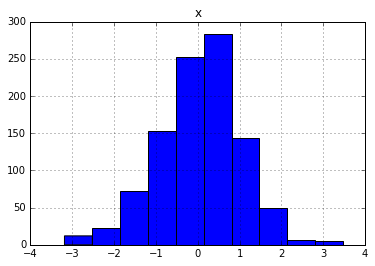

In [97]:
df0.hist(column='x');

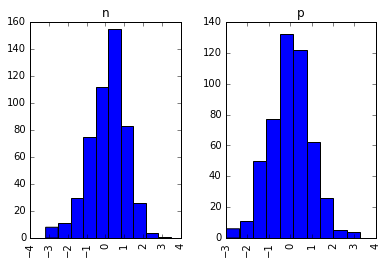

In [98]:
df0.hist(column='x',by='d',bins=10);

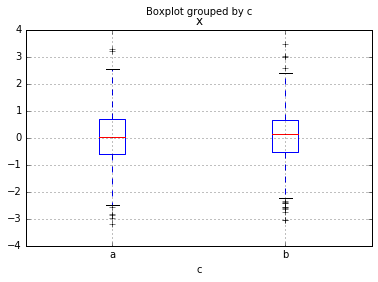

In [99]:
df0.boxplot(column='x', by='c');

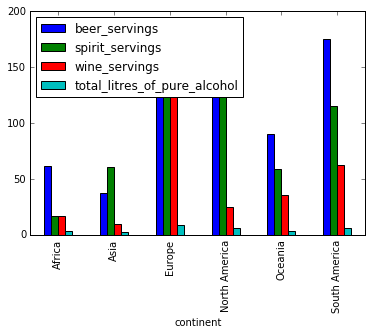

In [100]:
drinks.groupby('continent').mean().plot(kind='bar');